In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bengaluru1_df = pd.read_csv('bengaluru1.csv', encoding='ascii')

# Convert date_time from string to datetime
bengaluru1_df['date_time'] = pd.to_datetime(bengaluru1_df['date_time'])

# Set the date_time column as the index
bengaluru1_df.set_index('date_time', inplace=True)

# Filter the dataset for the years 2019 to 2020 and resample to an hourly basis
filtered_hourly_2019_2020_df = bengaluru1_df['2019':'2020'].resample('H').mean()

# Display the head of the filtered and resampled dataset
print(filtered_hourly_2019_2020_df.head())

# Calculate the number of rows in the filtered and resampled dataset
num_rows_hourly_2019_2020 = filtered_hourly_2019_2020_df.shape[0]
print('Number of rows for 2019 to 2020 on an hourly basis:', num_rows_hourly_2019_2020)

                     FeelsLikeC  humidity  tempC
date_time                                       
2019-01-01 00:00:00        18.0      74.0   18.0
2019-01-01 01:00:00        18.0      78.0   18.0
2019-01-01 02:00:00        17.0      82.0   17.0
2019-01-01 03:00:00        17.0      85.0   17.0
2019-01-01 04:00:00        17.0      83.0   17.0
Number of rows for 2019 to 2020 on an hourly basis: 8784


C:\Users\prit4\AppData\Local\Temp\ipykernel_13108\3956266638.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filtered_hourly_2019_2020_df = bengaluru1_df['2019':'2020'].resample('H').mean()


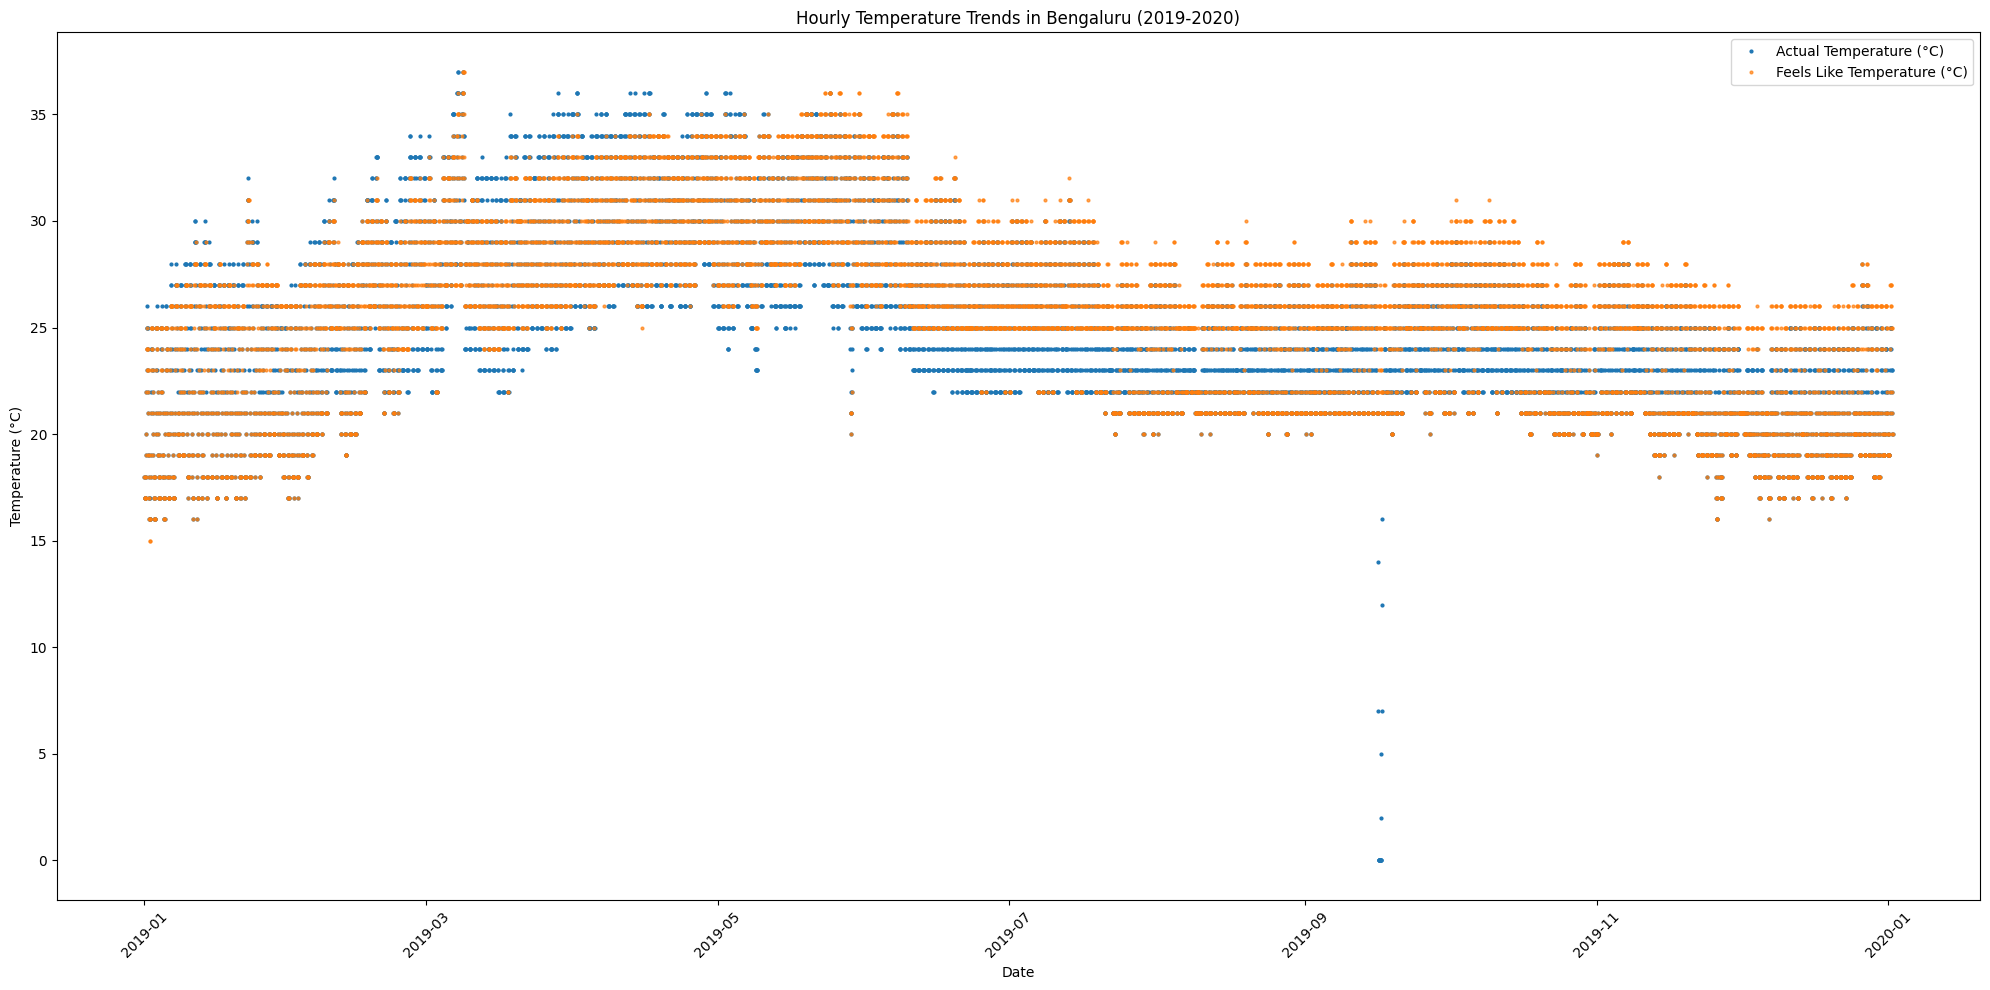

In [7]:
# Plotting the filtered and resampled hourly data for 2019 to 2020
plt.figure(figsize=(20, 10))
plt.plot(filtered_hourly_2019_2020_df.index, filtered_hourly_2019_2020_df['tempC'], label='Actual Temperature (°C)', marker='o', linestyle='', markersize=2)
plt.plot(filtered_hourly_2019_2020_df.index, filtered_hourly_2019_2020_df['FeelsLikeC'], label='Feels Like Temperature (°C)', alpha=0.7, marker='o', linestyle='', markersize=2)
plt.title('Hourly Temperature Trends in Bengaluru (2019-2020)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

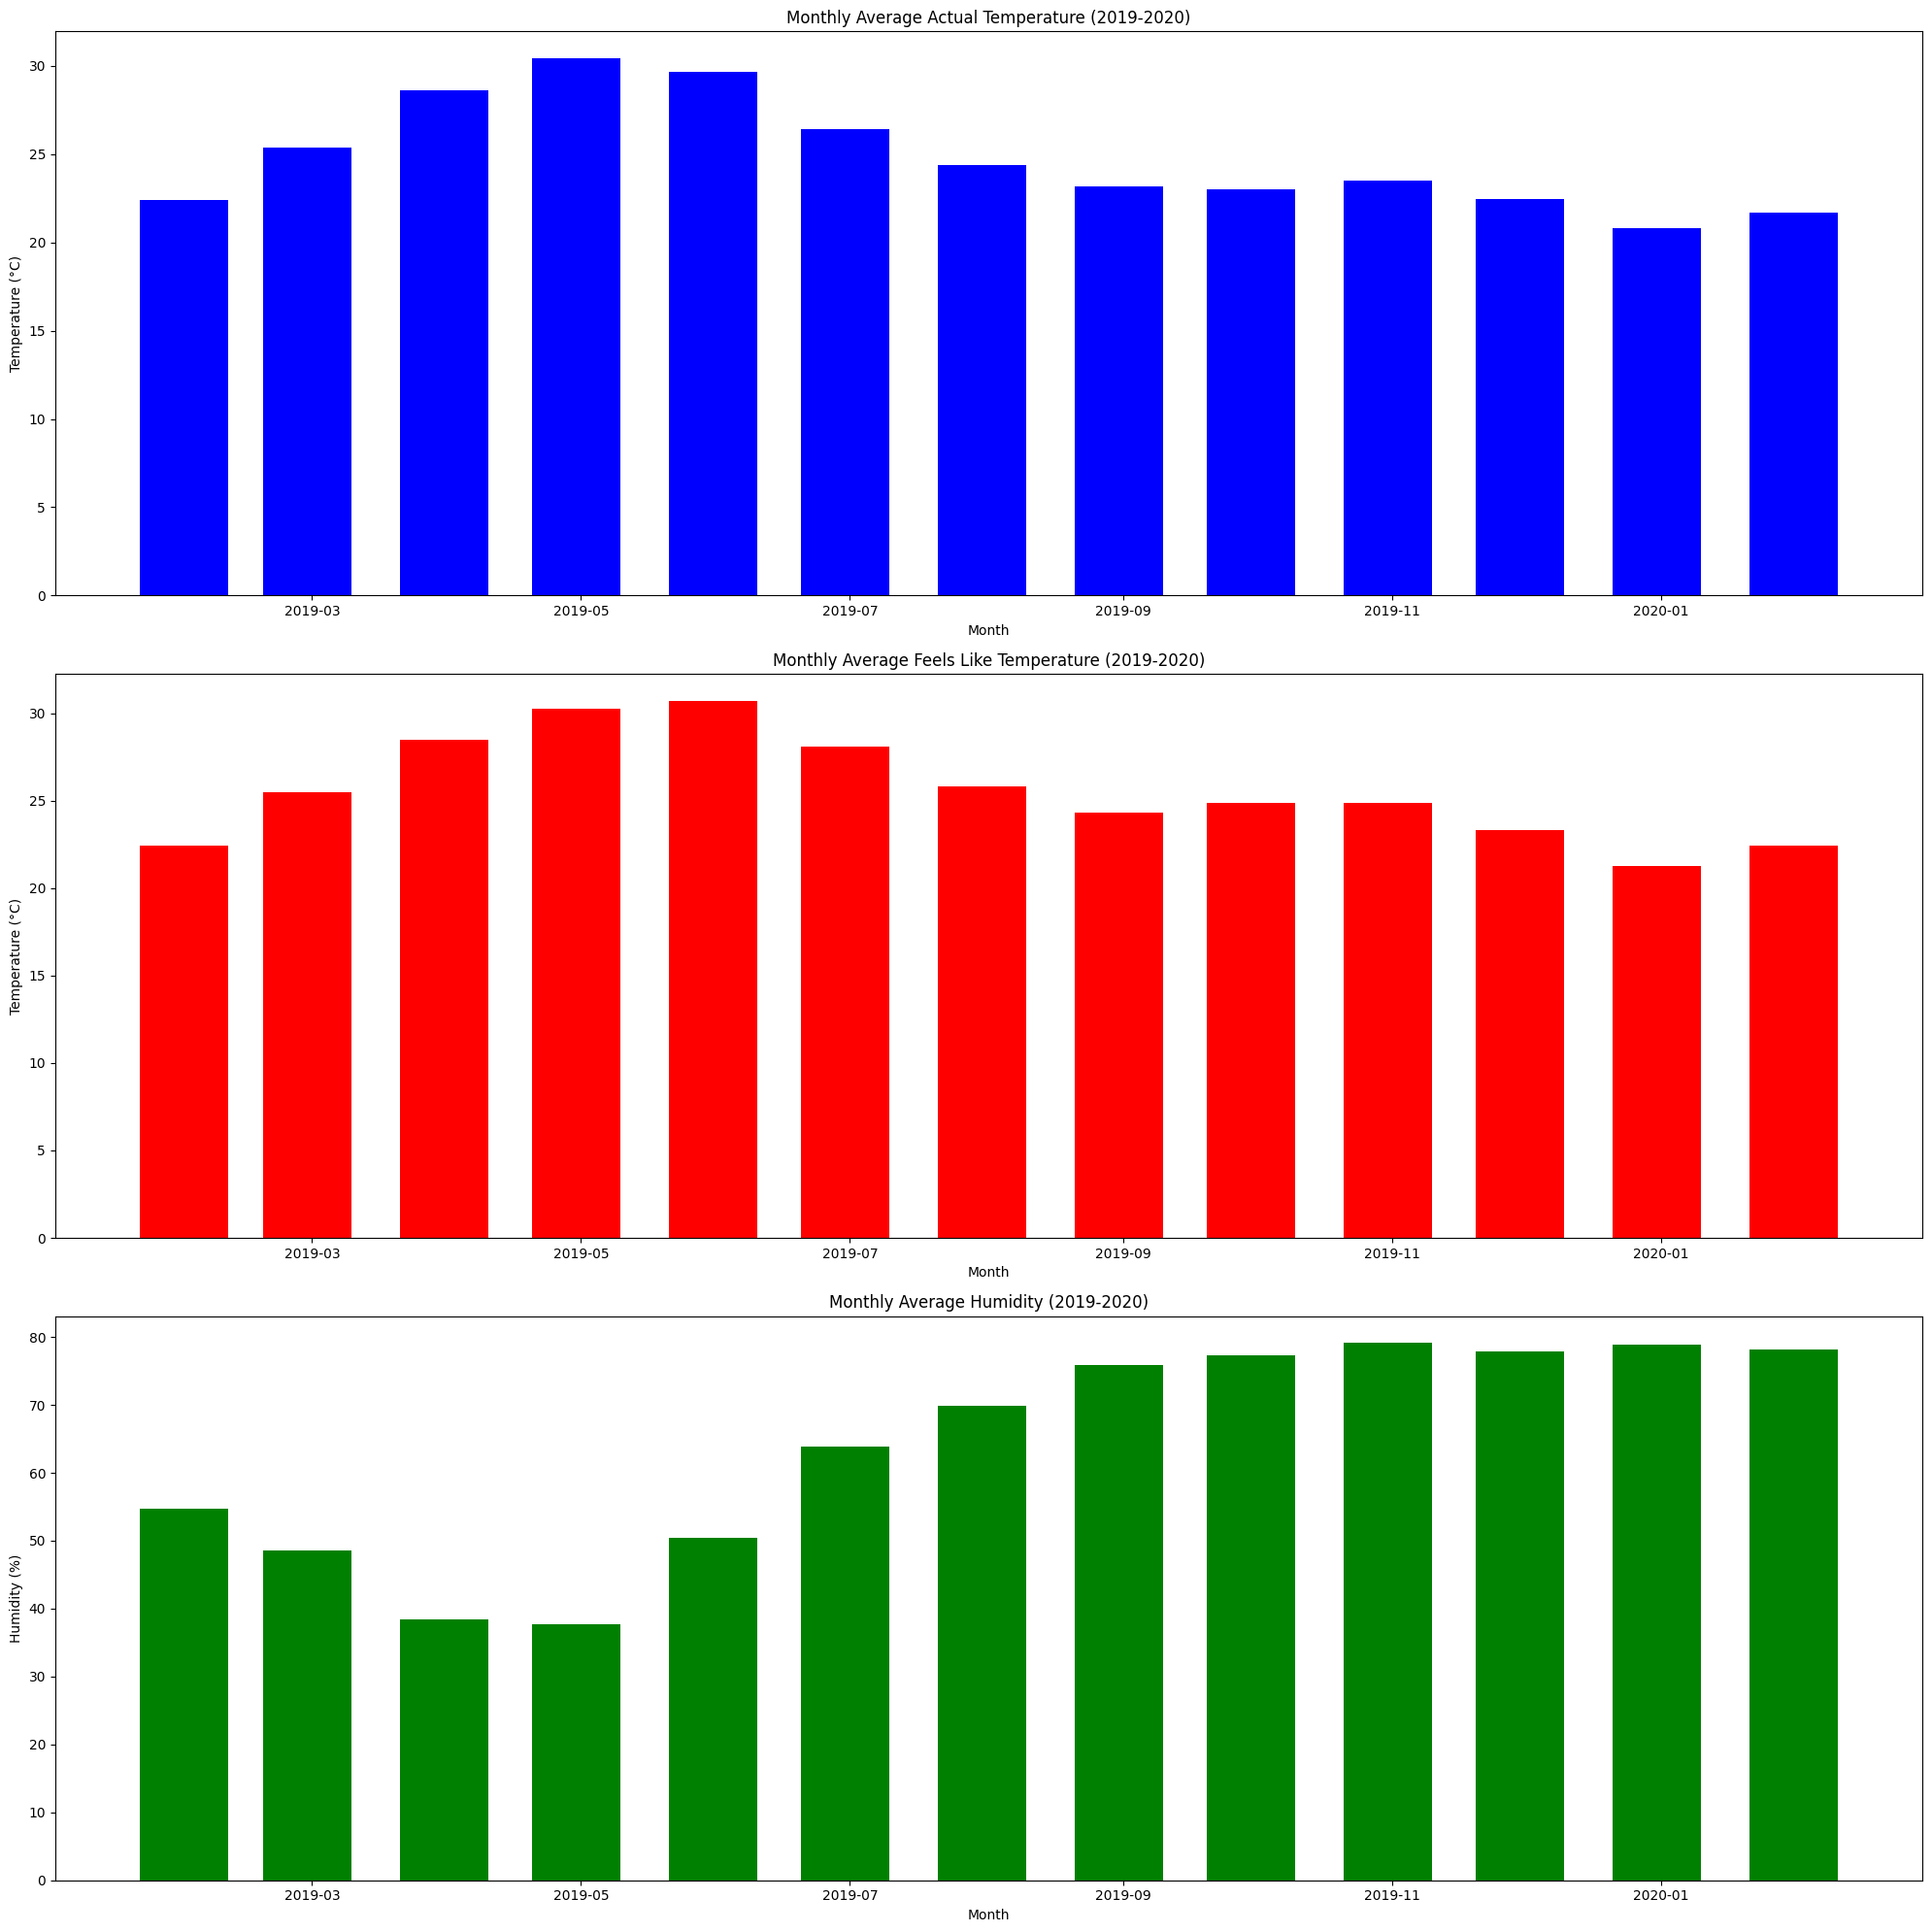

In [10]:
# Creating bar graphs for average temperatures and humidity in a single plot

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(20, 20))

# Actual Temperature
axs[0].bar(monthly_avg.index, monthly_avg['tempC'], color='blue', width=20)
axs[0].set_title('Monthly Average Actual Temperature (2019-2020)')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Temperature (°C)')

# Feels Like Temperature
axs[1].bar(monthly_avg.index, monthly_avg['FeelsLikeC'], color='red', width=20)
axs[1].set_title('Monthly Average Feels Like Temperature (2019-2020)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Temperature (°C)')

# Humidity
axs[2].bar(monthly_avg_humidity.index, monthly_avg_humidity['humidity'], color='green', width=20)
axs[2].set_title('Monthly Average Humidity (2019-2020)')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

In [11]:
# Splitting the date and time into two separate columns
bengaluru1_df.reset_index(inplace=True)
bengaluru1_df['date'] = bengaluru1_df['date_time'].dt.date
bengaluru1_df['time'] = bengaluru1_df['date_time'].dt.time

# Dropping the original date_time column
bengaluru1_df.drop('date_time', axis=1, inplace=True)

# Displaying the head of the modified dataframe to verify changes
print(bengaluru1_df.head())

   FeelsLikeC  humidity  tempC        date      time
0          18        91     14  2009-01-01  00:00:00
1          17        93     14  2009-01-01  01:00:00
2          16        94     13  2009-01-01  02:00:00
3          15        96     12  2009-01-01  03:00:00
4          18        88     14  2009-01-01  04:00:00


In [12]:
# Saving the modified dataframe to a new CSV file
bengaluru1_df.to_csv('bengaluru_modified.csv', index=False)

print("The modified dataset has been saved as 'bengaluru_modified.csv'.")

The modified dataset has been saved as 'bengaluru_modified.csv'.
